In [33]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix




In [2]:
# Data collection n Preprocessing
cdf = pd.read_csv("D:\Machine Learning Projects\Car price prediction\Csvs\car data.csv")

In [3]:
# Inspecting the top 5 rows
cdf.head()
# Fuel_type , seller_type and transmission are categorical features

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
cdf.shape

(301, 9)

In [9]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
cdf.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
cdf.isnull().sum()
# Contains no null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
print(cdf.Fuel_Type.value_counts())
print(cdf.Seller_Type.value_counts())
print(cdf.Transmission.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [16]:
# Encoding the categorical datas
cdf.replace({"Fuel_Type": {"Petrol": 0, "Diesel": 1, "CNG": 2}},inplace = True)
cdf.replace({"Seller_Type":{"Dealer": 0, "Individual": 1}}, inplace = True)
cdf.replace({"Transmission": {"Manual": 0 , "Automatic": 1}},inplace = True)

In [17]:
cdf.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


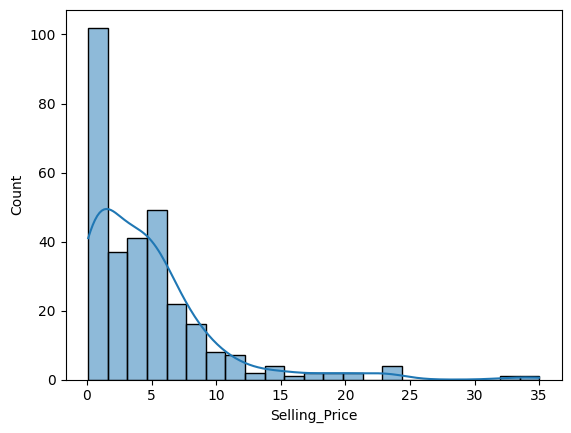

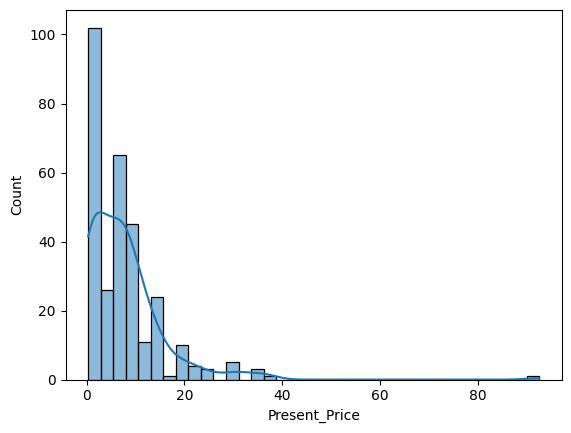

In [28]:
# Some visualization
sns.histplot(x = "Selling_Price" ,kde = True , data = cdf)
plt.show()
sns.histplot(x = "Present_Price" ,kde = True, data = cdf)
plt.show()

In [29]:
# Splitting the dataset
x = cdf.drop(["Car_Name", "Selling_Price"], axis = 1)
y = cdf["Selling_Price"]

In [30]:
print(x)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size= 0.8, random_state= 2)


In [34]:
# Model Training
lr = LinearRegression()

In [35]:
lr.fit(x_train, y_train)

LinearRegression()

In [38]:
# Model evaluation 
lr_predict = lr.predict(x_train)
# error R square
error_score = metrics.r2_score(y_train, lr_predict)
print("Error r square value: ",error_score)

Error r square value:  0.8838169193709797


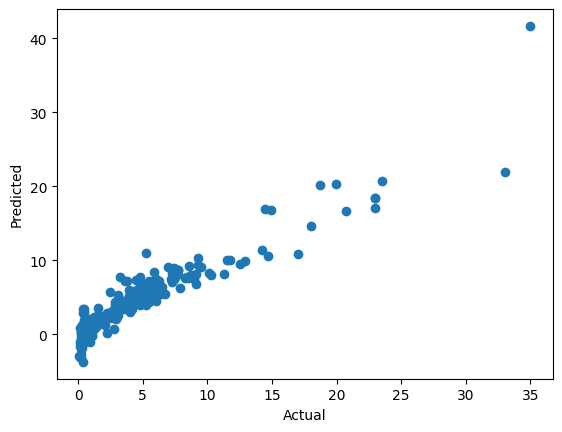

In [39]:
# Visualizing the actual and the predicted price 
plt.scatter(y_train,lr_predict)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [40]:
test_lr_predict = lr.predict(x_test) 

In [41]:
er_test = metrics.r2_score(y_test, test_lr_predict)
print(er_test)

0.8401532365378493


In [42]:
input_data = (2014, 5.59, 27000,0 , 0 , 0, 0)
# changing input_data from tuple to numppy array
'''
Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
'''
input_nparr = np.asanyarray(input_data)

# reshaping the data
input_data_reshaped = input_nparr.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)


[3.82765933]


C:\Users\VIJAY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


From the Prediction we can see the selling price was 3.35 and we predicted as 3.82 we can say out model did well


In [43]:
# Lasso Regression
lsr = Lasso()
lsr.fit(x_train,y_train)
 

Lasso()

In [44]:
# Model evaluation
train_lspredict = lsr.predict(x_train)
error_lsscore = metrics.r2_score(y_train,train_lspredict)
print(error_lsscore)

0.8435873952582826


In [45]:
# Prediction on test data 
test_lspredict = lsr.predict(x_test)
error_lstest = metrics.r2_score(y_test,test_lspredict)
print(error_lstest)


0.8497457570738528


In [46]:
input_data = (2014, 5.59, 27000,0 , 0 , 0, 0)
# changing input_data from tuple to numppy array
'''
Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
'''
input_nparr = np.asanyarray(input_data)

# reshaping the data
input_data_reshaped = input_nparr.reshape(1,-1)

prediction = lsr.predict(input_data_reshaped)
print(prediction)


[3.81549633]


C:\Users\VIJAY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


After comparing we can see slight improvement in the Lassor regression 